# Use this dataset of airline information to predict how late flights will be. A flight only counts as late if it is more than 30 minutes late.

Show with a table (or ideally with a graph) the total number of flights, on January, in 2008.For each month of data available from January 2008 (inclusive), obtain many airports with the greatest reduction in the number of flights.

goals:
1-Develop a predictive model of the GAIN variable using somee methods. Briefly justify the goodness / power of the model developed.

2-Generate a model using Naive Bayes, Logistic Regression, Decision Tree, Random Forest, Gradient Boosting and SVM that allows us to predict the probability of a flight delay. We want to know the origins with the highest and lowest probability of being delayed, as well as the destinations with the highest and lowest probability of being delayed. Finally, we will obtain the probability of suffering a delay based on the month, day of the month, day of the week and time of day and we will compare those results with those obtained in the first exercise.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
airlines=pd.read_csv("new.csv")
airlines.head(5)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 29
0,2008,1,12,6,9E,87339E,3706,MLI,DTW,630,...,98.0,85.0,64.0,373.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,1,14,1,9E,80009E,3706,MLI,DTW,630,...,98.0,103.0,64.0,373.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,1,15,2,9E,87219E,3706,MLI,DTW,630,...,98.0,109.0,80.0,373.0,34.0,0.0,11.0,0.0,0.0,NaN
3,2008,1,16,3,9E,80019E,3706,MLI,DTW,630,...,98.0,104.0,62.0,373.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,1,17,4,9E,88009E,3706,MLI,DTW,630,...,98.0,105.0,72.0,373.0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
airlines.shape

(605765, 30)

In [4]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605765 entries, 0 to 605764
Data columns (total 30 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 605765 non-null  int64  
 1   MONTH                605765 non-null  int64  
 2   DAY_OF_MONTH         605765 non-null  int64  
 3   DAY_OF_WEEK          605765 non-null  int64  
 4   OP_UNIQUE_CARRIER    605765 non-null  object 
 5   TAIL_NUM             595813 non-null  object 
 6   OP_CARRIER_FL_NUM    605765 non-null  int64  
 7   ORIGIN               605765 non-null  object 
 8   DEST                 605765 non-null  object 
 9   CRS_DEP_TIME         605765 non-null  int64  
 10  DEP_TIME             588457 non-null  float64
 11  DEP_DELAY            588457 non-null  float64
 12  TAXI_OUT             588457 non-null  float64
 13  TAXI_IN              587130 non-null  float64
 14  CRS_ARR_TIME         605765 non-null  int64  
 15  ARR_TIME         

we want to expalin each of the attributes for first dataset(df1)
1-Year
2-Month
3-Day Of Month
4-Unique Carrier Code
5-Tail Number
6-Flight Number
7-Origin Airport
8-Destination Airport
9-CRS Departure Time (local time: hhmm)
10-Actual Departure Time (local time: hhmm)
11-Difference in minutes between scheduled and actual departure time. Early departures show negative numbers.
12-Taxi Out Time, in Minutes
13-Taxi IN Time, in Minutes
14-CRS Arrival Time (local time: hhmm)
15-Actual Arrival Time (local time: hhmm)
16-Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers.
17-Cancelled Flight Indicator (1=Yes)		
18-Specifies The Reason For Cancellation		
19-Diverted Flight Indicator (1=Yes)		
20-CRS Elapsed Time of Flight, in Minutes		
21-Elapsed Time of Flight, in Minutes		
22-Flight Time, in Minutes
23-Distance between airports (miles)		
24-Carrier Delay, in Minutes
25-Weather Delay, in Minutes
26-National Air System Delay, in Minutes
27-Security Delay, in Minutes
28-Late Aircraft Delay, in Minutes

In [5]:
# Replace using median 
median = airlines['DEP_TIME'].median()
airlines['DEP_TIME'].fillna(median, inplace=True)
median = airlines['DEP_DELAY'].median()
airlines['DEP_DELAY'].fillna(median, inplace=True)
median = airlines['TAXI_OUT'].median()
airlines['TAXI_OUT'].fillna(median, inplace=True)
median = airlines['TAXI_IN'].median()
airlines['TAXI_IN'].fillna(median, inplace=True)
median = airlines['ARR_TIME'].median()
airlines['ARR_TIME'].fillna(median, inplace=True)
median = airlines['ARR_DELAY'].median()
airlines['ARR_DELAY'].fillna(median, inplace=True)
median = airlines['ARR_DELAY'].median()
airlines['ARR_DELAY'].fillna(median, inplace=True)
median = airlines['CRS_ELAPSED_TIME'].median()
airlines['CRS_ELAPSED_TIME'].fillna(median, inplace=True)
median = airlines['ACTUAL_ELAPSED_TIME'].median()
airlines['ACTUAL_ELAPSED_TIME'].fillna(median, inplace=True)
median = airlines['AIR_TIME'].median()
airlines['AIR_TIME'].fillna(median, inplace=True)
median = airlines['AIR_TIME'].median()
airlines['AIR_TIME'].fillna(median, inplace=True)
median = airlines['LATE_AIRCRAFT_DELAY'].median()
airlines['LATE_AIRCRAFT_DELAY'].fillna(median, inplace=True)
median = airlines['SECURITY_DELAY'].median()
airlines['SECURITY_DELAY'].fillna(median, inplace=True)
median = airlines['NAS_DELAY'].median()
airlines['NAS_DELAY'].fillna(median, inplace=True)
median = airlines['CARRIER_DELAY'].median()
airlines['CARRIER_DELAY'].fillna(median, inplace=True)

In [6]:
# we can use median for non nominal values
airlines.isnull().sum()

YEAR                        0
MONTH                       0
DAY_OF_MONTH                0
DAY_OF_WEEK                 0
OP_UNIQUE_CARRIER           0
TAIL_NUM                 9952
OP_CARRIER_FL_NUM           0
ORIGIN                      0
DEST                        0
CRS_DEP_TIME                0
DEP_TIME                    0
DEP_DELAY                   0
TAXI_OUT                    0
TAXI_IN                     0
CRS_ARR_TIME                0
ARR_TIME                    0
ARR_DELAY                   0
CANCELLED                   0
CANCELLATION_CODE      588457
DIVERTED                    0
CRS_ELAPSED_TIME            0
ACTUAL_ELAPSED_TIME         0
AIR_TIME                    0
DISTANCE                    0
CARRIER_DELAY               0
WEATHER_DELAY          456958
NAS_DELAY                   0
SECURITY_DELAY              0
LATE_AIRCRAFT_DELAY         0
Unnamed: 29            605765
dtype: int64

we can  transform the NAN-data to the value "0.0" because there was no impact on the flight that causes a delay.

Null values have now decreased Drastically. There are only a few attributes left.

In [7]:
airlines['WEATHER_DELAY'] =airlines['WEATHER_DELAY'].fillna(0)
airlines['TAIL_NUM'] =airlines['TAIL_NUM'].fillna(0)
airlines['CANCELLATION_CODE'] =airlines['CANCELLATION_CODE'].fillna('D')

In [8]:
airlines.isnull().sum()

YEAR                        0
MONTH                       0
DAY_OF_MONTH                0
DAY_OF_WEEK                 0
OP_UNIQUE_CARRIER           0
TAIL_NUM                    0
OP_CARRIER_FL_NUM           0
ORIGIN                      0
DEST                        0
CRS_DEP_TIME                0
DEP_TIME                    0
DEP_DELAY                   0
TAXI_OUT                    0
TAXI_IN                     0
CRS_ARR_TIME                0
ARR_TIME                    0
ARR_DELAY                   0
CANCELLED                   0
CANCELLATION_CODE           0
DIVERTED                    0
CRS_ELAPSED_TIME            0
ACTUAL_ELAPSED_TIME         0
AIR_TIME                    0
DISTANCE                    0
CARRIER_DELAY               0
WEATHER_DELAY               0
NAS_DELAY                   0
SECURITY_DELAY              0
LATE_AIRCRAFT_DELAY         0
Unnamed: 29            605765
dtype: int64

In [9]:
# Reason why you cancel your flight
airlines['CANCELLATION_CODE'].value_counts()
#"A","Carrier"
#"B","Security"
#"C","National Air System"
#"D","Weather"

D    588457
B      6711
A      6635
C      3962
Name: CANCELLATION_CODE, dtype: int64

we can see the waather is the main reason for cancelling the flight.

In [10]:
airlines.isnull().sum()

YEAR                        0
MONTH                       0
DAY_OF_MONTH                0
DAY_OF_WEEK                 0
OP_UNIQUE_CARRIER           0
TAIL_NUM                    0
OP_CARRIER_FL_NUM           0
ORIGIN                      0
DEST                        0
CRS_DEP_TIME                0
DEP_TIME                    0
DEP_DELAY                   0
TAXI_OUT                    0
TAXI_IN                     0
CRS_ARR_TIME                0
ARR_TIME                    0
ARR_DELAY                   0
CANCELLED                   0
CANCELLATION_CODE           0
DIVERTED                    0
CRS_ELAPSED_TIME            0
ACTUAL_ELAPSED_TIME         0
AIR_TIME                    0
DISTANCE                    0
CARRIER_DELAY               0
WEATHER_DELAY               0
NAS_DELAY                   0
SECURITY_DELAY              0
LATE_AIRCRAFT_DELAY         0
Unnamed: 29            605765
dtype: int64

After the the cleaning the first data set, we have to figure out how can impact of the delay with carriers and airport data and we want to join into the first one.

In [11]:
airports=pd.read_csv('airports.csv')
airports

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944
...,...,...,...,...,...,...,...
3371,ZEF,Elkin Municipal,Elkin,NC,USA,36.280024,-80.786069
3372,ZER,Schuylkill Cty/Joe Zerbey,Pottsville,PA,USA,40.706449,-76.373147
3373,ZPH,Zephyrhills Municipal,Zephyrhills,FL,USA,28.228065,-82.155916
3374,ZUN,Black Rock,Zuni,NM,USA,35.083227,-108.791777


In [12]:
carriers=pd.read_csv('carriers.csv')
carriers
#the code with the name of the airlines

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.
...,...,...
1486,ZW,Air Wisconsin Airlines Corp
1487,ZX,Air Georgian
1488,ZX (1),Airbc Ltd.
1489,ZY,Atlantic Gulf Airlines


In [13]:
# when we have cancellation and the distaces between two airports is more than 4000 meter(only Atlanta )
airlines[(airlines['CANCELLED']==1)& (airlines['DISTANCE']>4000)]

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 29
352189,2008,1,27,7,DL,N832MH,1282,HNL,ATL,1635,...,512.0,111.0,86.0,4502.0,0.0,0.0,5.0,0.0,0.0,NaN


In [14]:
# we use filter with diverted (yes=1)and when  Distance between airports is less than 300(miles)
airlines[(airlines['DIVERTED']==1)& (airlines['DISTANCE']<300)]

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 29
1496,2008,1,30,3,9E,88369E,3756,DTW,BUF,1013,...,111.0,111.0,86.0,240.0,0.0,0.0,5.0,0.0,0.0,NaN
5777,2008,1,27,7,9E,89649E,5955,SGF,MEM,640,...,111.0,111.0,86.0,243.0,0.0,0.0,5.0,0.0,0.0,NaN
6149,2008,1,26,6,9E,84779E,5965,MEM,XNA,1935,...,111.0,111.0,86.0,258.0,0.0,0.0,5.0,0.0,0.0,NaN
34753,2008,1,10,4,MQ,N323AE,3011,LAX,FAT,815,...,74.0,111.0,86.0,209.0,0.0,0.0,5.0,0.0,0.0,NaN
34791,2008,1,15,2,MQ,N240DS,3013,LAX,FAT,1000,...,47.0,111.0,86.0,209.0,0.0,0.0,5.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596168,2008,1,31,4,WN,N340LV,1330,STL,MDW,1225,...,60.0,111.0,86.0,251.0,0.0,0.0,5.0,0.0,0.0,NaN
597045,2008,1,29,2,XE,N13550,125,SAN,ONT,2136,...,20.0,111.0,86.0,94.0,0.0,0.0,5.0,0.0,0.0,NaN
598415,2008,1,5,6,XE,N12163,224,SAT,AUS,1655,...,17.0,111.0,86.0,66.0,0.0,0.0,5.0,0.0,0.0,NaN
599283,2008,1,24,4,XE,N14204,321,TUL,OKC,1835,...,25.0,111.0,86.0,111.0,0.0,0.0,5.0,0.0,0.0,NaN


In [15]:
airlines['CANCELLATION_CODE'].unique()
CANCELLATION_CODE_DEST=pd.crosstab(airlines['CANCELLATION_CODE'],airlines['DEST'])
CANCELLATION_CODE_DEST

DEST,ABE,ABI,ABQ,ABY,ACT,ACV,ACY,ADK,ADQ,AEX,...,TXK,TYR,TYS,VLD,VPS,WRG,XNA,YAK,YKM,YUM
CANCELLATION_CODE,,,,,,,,,,,,,,,,,,,,,
A,12,0,23,0,0,1,0,0,2,1,...,4,2,10,0,2,0,24,3,0,5
B,3,7,9,5,9,7,2,0,3,8,...,9,7,13,3,11,2,16,1,1,0
C,8,0,3,0,1,20,0,0,0,0,...,0,0,4,0,1,0,21,0,0,1
D,393,233,3411,97,199,271,29,9,57,197,...,111,145,992,79,558,60,1138,58,31,375


In [16]:
airlines['DIVERTED'].unique()
DIVERTED_CANCELLATION_CODE=pd.crosstab(airlines['DIVERTED'],airlines['CANCELLATION_CODE'])
DIVERTED_CANCELLATION_CODE
# As you see, if the Diverted Flight Indicator is 1=yes, the reason for cancellation is weather

CANCELLATION_CODE,A,B,C,D
DIVERTED,,,,
0.0,6635,6711,3962,587130
1.0,0,0,0,1327


In [17]:
# we use the groupby with sum, count and delay part for ARR_DELAY with Destination
airlines_grouped_sum = airlines.groupby('DEST', as_index= False)['ARR_DELAY'].agg('sum').rename(columns={"ARR_DELAY":"ARR_DELAY_SUM"})
airlines_grouped_cnt = airlines.groupby('DEST', as_index= False)['ARR_DELAY'].agg('count').rename(columns={"ARR_DELAY":"ARR_DELAY_CNT"})
# Merge the two groups together
airlines_grouped_delay = airlines_grouped_sum.merge(airlines_grouped_cnt, left_on='DEST', right_on='DEST', how='inner')

# Calculate the average delay per destination
airlines_grouped_delay.loc[:,'AVG_ARR_DELAY'] = airlines_grouped_delay['ARR_DELAY_SUM'] /airlines_grouped_delay['ARR_DELAY_CNT']

airlines_grouped_delay.sort_values('ARR_DELAY_SUM', ascending=False)

,DEST,ARR_DELAY_SUM,ARR_DELAY_CNT,AVG_ARR_DELAY
199,ORD,838358.0,29936,28.005011
244,SFO,387248.0,11560,33.498962
148,LAX,257506.0,18964,13.578675
78,DFW,211761.0,23874,8.869942
16,ATL,208002.0,33881,6.139193
...,...,...,...,...
66,CPR,-219.0,301,-0.727575
216,PSE,-305.0,109,-2.798165
194,OGG,-1510.0,2078,-0.726660
136,ITO,-1866.0,786,-2.374046


In conclusion, ABE  has the smallest average of delay in the destination(AVG_ARR_DELAY==-6.29032). On the other hand , YUM Destination has a lot of huge delays in single flights which effects the total delay of the airline,
(alomost AVG_ARR_DELAY ==64.7294 and for sum is 838358.I used max and min in the last piece of code to figure out .

In [18]:
pd.pivot_table(airlines,index=['DEST'],values='ARR_TIME')[:35]

,ARR_TIME
DEST,
ABE,1775.615385
ABI,1744.191667
ABQ,1501.047882
ABY,1576.176471
ACT,1478.200957
ACV,1467.809365
ACY,2132.161290
ADK,1651.555556
ADQ,1309.129032


In [19]:
airlines['DIVERTED'].unique()
DIVERTED_CANCELLATION_CODE=pd.crosstab(airlines['DIVERTED'],airlines['CANCELLATION_CODE'])
DIVERTED_CANCELLATION_CODE
# As you see, if the Diverted Flight Indicator is 1=yes, the reason for cancellation is weather

CANCELLATION_CODE,A,B,C,D
DIVERTED,,,,
0.0,6635,6711,3962,587130
1.0,0,0,0,1327


# Visualizations (scatter plot, bar graph, histogram, boxplot, subplot, pie chart, heatmap)

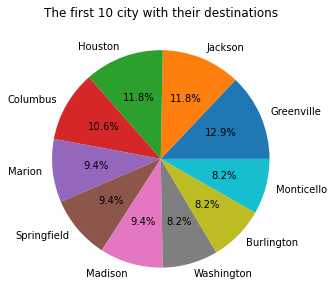

In [20]:
# categorized the cities
plt.rcParams['figure.figsize']=(10,5)
airports['city'].value_counts().sort_values(ascending=False).head(10).plot.pie(y='city',autopct="%0.1f%%")
plt.title('The first 10 city with their destinations')
plt.axis('off')
plt.show()
#the Greenville has the high most of amount destination(percantage)

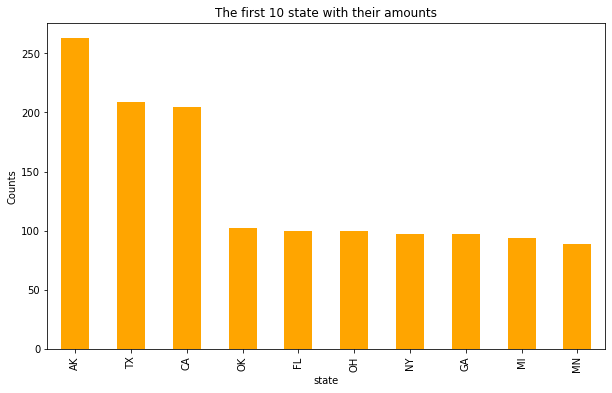

In [21]:
plt.rcParams['figure.figsize']=(10,6)
airports['state'].value_counts().sort_values(ascending=False).head(10).plot.bar(color='orange')
plt.title('The first 10 state with their amounts')
plt.xlabel('state')
plt.ylabel('Counts')
plt.show()

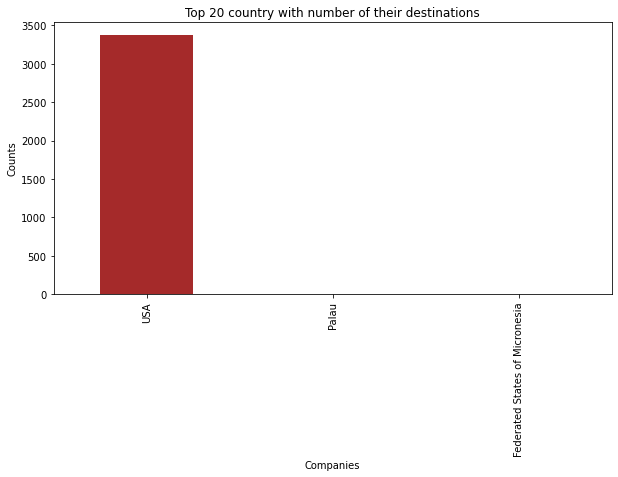

In [22]:
#Top 20 companies with most number of jobs
plt.rcParams['figure.figsize']=(10,5)
airports['country'].value_counts().sort_values(ascending=False).head(3).plot.bar(color='brown')
plt.title('Top 20 country with number of their destinations')
plt.xlabel('Companies')
plt.ylabel('Counts')
plt.show()

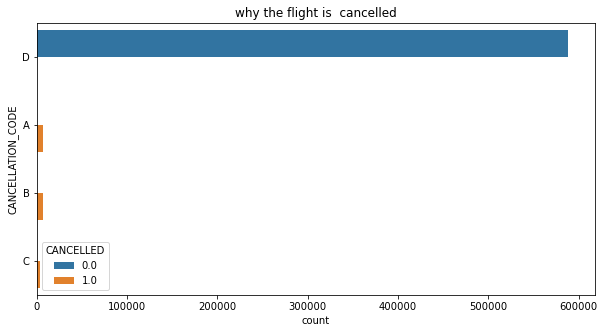

<Figure size 720x360 with 0 Axes>

In [23]:
sns.countplot(data=airlines,y='CANCELLATION_CODE',hue='CANCELLED')
plt.title('why the flight is  cancelled')
plt.figure(figsize=(10,5))
plt.show()
# it shows the weather is the main reason for cancellation when is (zero)

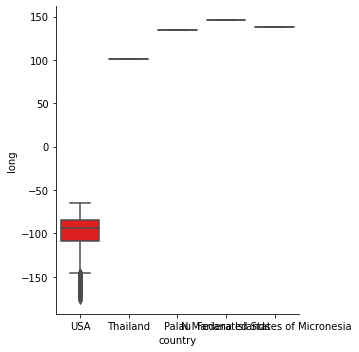

In [24]:
sns.catplot('country','long',data=airports,kind='box', color='red')
# the US has the most longitude of the airport

(array([5.69975e+05, 3.34750e+04, 1.99800e+03, 2.11000e+02, 5.10000e+01,
        3.20000e+01, 1.40000e+01, 7.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([ -91. ,   70.6,  232.2,  393.8,  555.4,  717. ,  878.6, 1040.2,
        1201.8, 1363.4, 1525. ]),
 <a list of 10 Patch objects>)

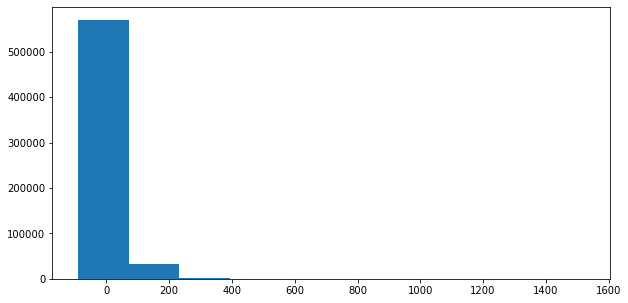

In [25]:
plt.hist(airlines['ARR_DELAY'])
#Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers.(between lower than zero until 200(almost)).

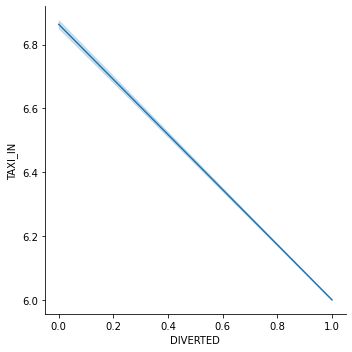

In [26]:
sns.relplot('DIVERTED','TAXI_IN',data=airlines,kind='line')

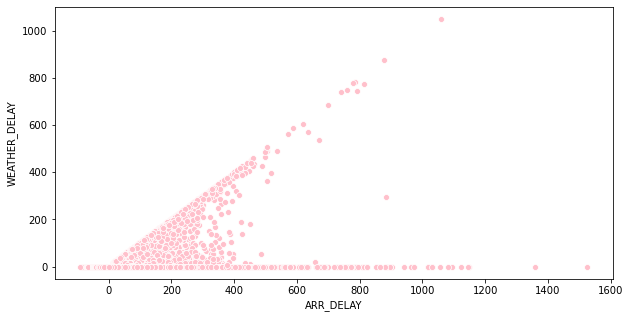

In [27]:
sns.scatterplot(x='ARR_DELAY',y='WEATHER_DELAY',
        data=airlines,color='pink')
#we figure out the most the Actual Arrival Time for weather delay is between zero and 400(hhmm)

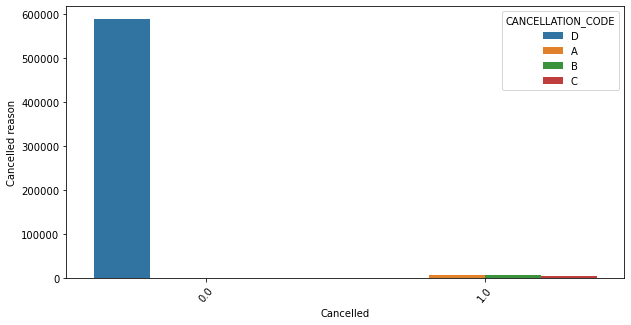

In [28]:
fig,ax=plt.subplots(figsize=(10,5))
sns.countplot(airlines['CANCELLED'],hue=airlines['CANCELLATION_CODE'],ax=ax)
plt.xlabel('Cancelled')
plt.ylabel('Cancelled reason')
plt.xticks(rotation=50)
plt.show()
#it is clear that the weather has the main portion for cancelling the flight

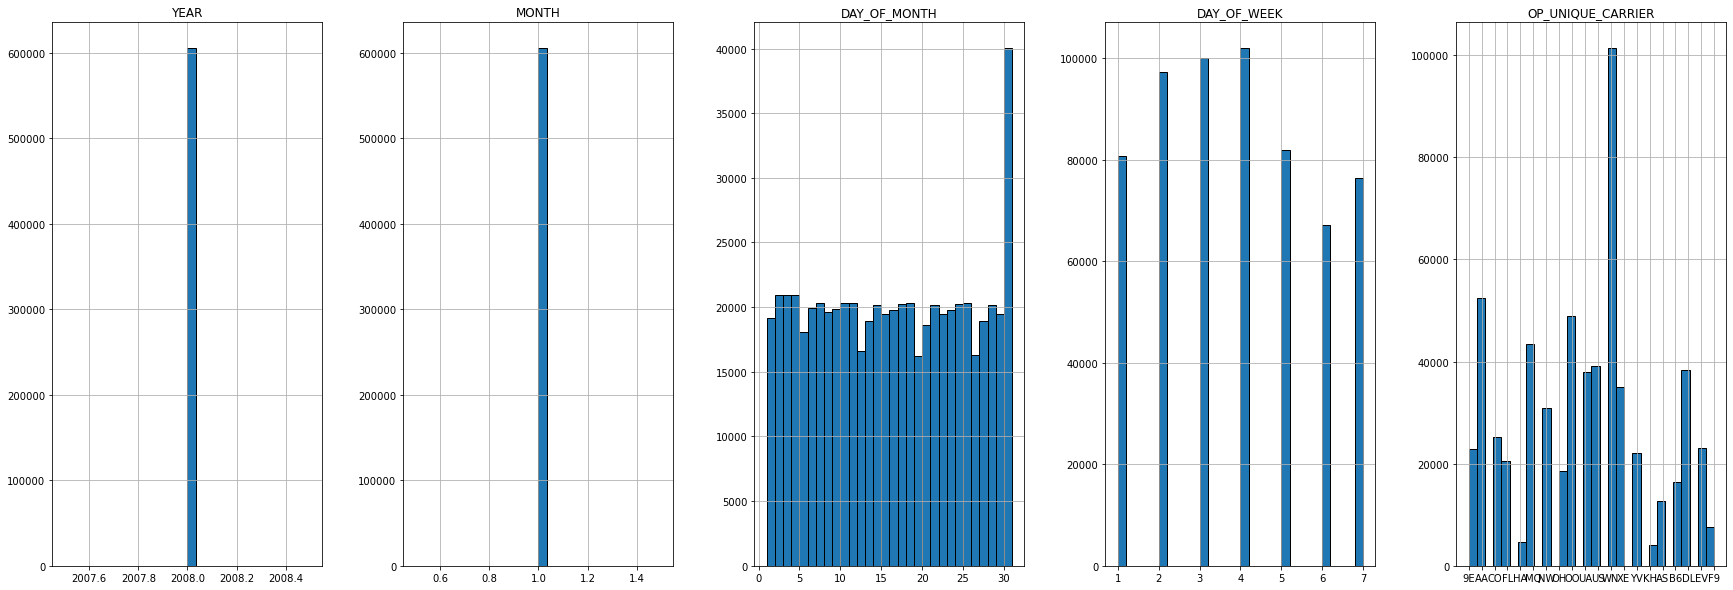

In [29]:
# abundance for each of the columns
import itertools
columns=airlines.columns[:5]
plt.subplots(figsize=(30,28))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),5,j+1)
    plt.subplots_adjust(wspace=0.3,hspace=0.8)
    airlines[i].hist(bins=30,edgecolor='black')
    plt.title(i)
plt.show()

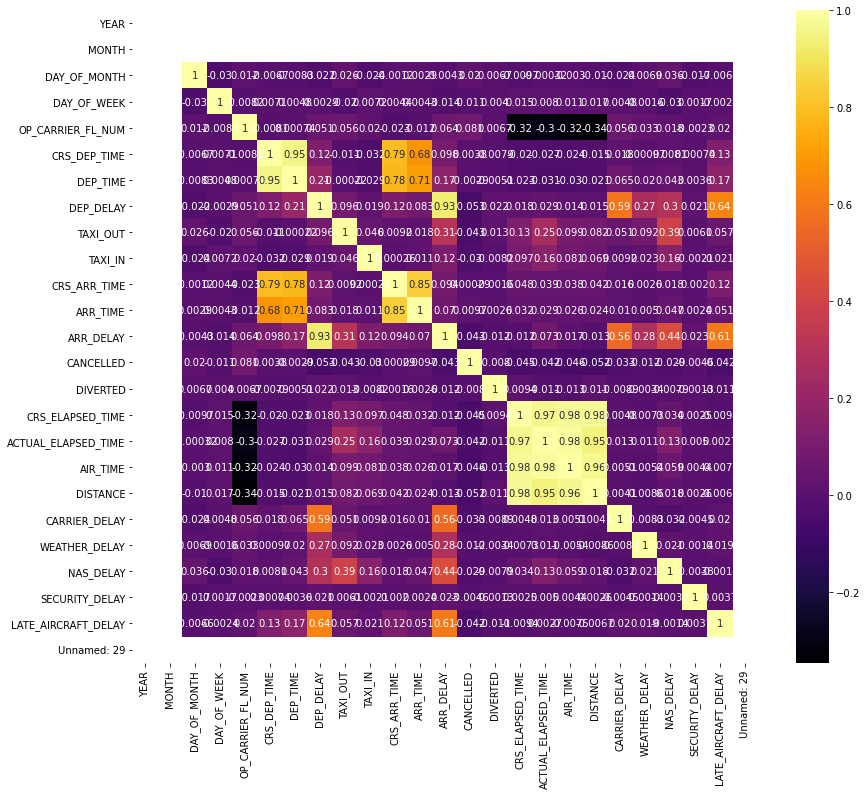

In [30]:
# Dataframe correlation
del_corr = airlines.corr()

# figure
f, ax = plt.subplots(figsize=(14, 12))

# Draw the heatmap
sns.heatmap(del_corr,annot=True,cmap='inferno')
plt.show()

we have 2 correlation: positive (more then .6 ) and negative (less than .6 and higher than .2)

Positive correlations between:

DEPARTURE_DELAY and

CARRIER_DELAY

LATE_AIRCRAFT_DELAY

ARRIVAL_DELAY and

DEPARTURE_DELAY

LATE_AIRCRAFT_DELAY

Negative correlation between:

ARRIVAL_DELAY and

NAS_DELAY

WEATHER_DELAY

DEPARTURE_DELAY and

NAS_DELAY

WEATHER_DELAY

TAXI_OUT and

ELAPSED_TIME

In [31]:
# Marking the delayed flights
airlines['DELAYED'] = airlines.loc[:,'ARR_DELAY'].values > 30

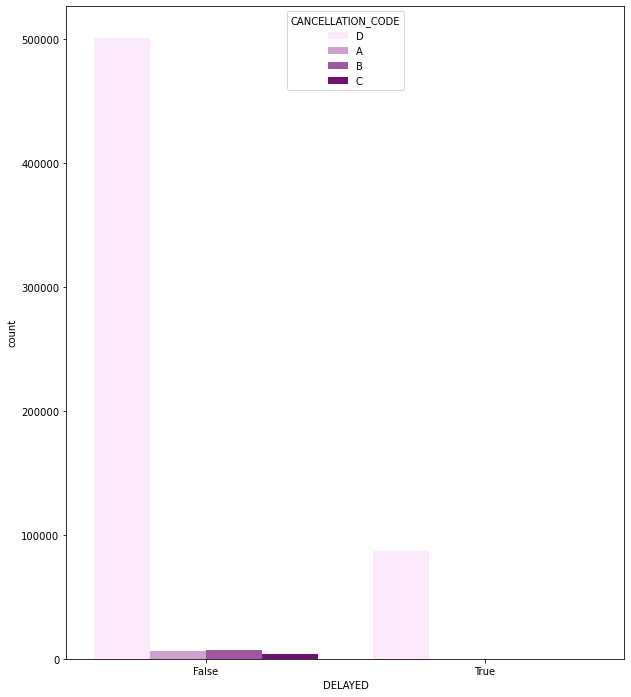

In [32]:
figsize=plt.subplots(figsize=(10,12))
sns.countplot(x='DELAYED',hue='CANCELLATION_CODE',data=airlines,color='purple')
plt.show()
#The most cancellation portion is for weather problem when we have delay also and not

In this part, we want to know which part of delay has the most portion (1-Carrier Delay in Minutes,2-Weather Delay in Minutes,3-National Air System Delay in Minutes,4-SecurityDelay in Minutes,5-Late Aircraft Delay, in Minutes)

# we want to make models with (Naïve Bayes, Logistic Regression, Decision Tree,Random Forest, Gradient Boosting and SVM)

In [33]:
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score,precision_score,recall_score,auc,accuracy_score

In [34]:
# Label definition
y = airlines.DELAYED

# Choosing the predictors
feature_list_s = [
    'LATE_AIRCRAFT_DELAY'
    ,'CARRIER_DELAY'
    ,'NAS_DELAY'
    ,'WEATHER_DELAY'
    ,'ACTUAL_ELAPSED_TIME']

# New dataframe based on a small feature list
X_small = airlines[feature_list_s]

In [35]:
# RandomForestClassifier with 10 trees and fitted on the small feature set 
clf = RandomForestClassifier(n_estimators = 11, random_state=150,min_samples_split=3,bootstrap=True) 
clf.fit(X_small, y)

RandomForestClassifier(min_samples_split=3, n_estimators=11, random_state=150)

In [36]:
importances=clf.feature_importances_
importances=pd.DataFrame([X_small.columns,importances]).transpose()
importances.columns=[['Variables','Importance']]
importances
# we can see the Late Aircraft Delay  has the highest portion that has been delayed.

,Variables,Importance
0,LATE_AIRCRAFT_DELAY,0.385847
1,CARRIER_DELAY,0.249461
2,NAS_DELAY,0.317197
3,WEATHER_DELAY,0.0421657
4,ACTUAL_ELAPSED_TIME,0.0053286


In [37]:
# choosing the predictors
feature_list = [
    'YEAR'
    ,'MONTH'
    ,'LATE_AIRCRAFT_DELAY'
    ,'ARR_DELAY'
    ,'NAS_DELAY'
    ,'WEATHER_DELAY'
    ,'ACTUAL_ELAPSED_TIME'
    ,'DEP_DELAY'
    ,'CARRIER_DELAY'
    ,'AIR_TIME'
    ,'DISTANCE'
    ,'TAXI_IN'
    ,'TAXI_OUT'
    ,'DAY_OF_WEEK'
    ,'SECURITY_DELAY'
]

airlines_1=airlines.sample(n=30000)
X = airlines_1[feature_list]

In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 95208 to 491614
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 30000 non-null  int64  
 1   MONTH                30000 non-null  int64  
 2   LATE_AIRCRAFT_DELAY  30000 non-null  float64
 3   ARR_DELAY            30000 non-null  float64
 4   NAS_DELAY            30000 non-null  float64
 5   WEATHER_DELAY        30000 non-null  float64
 6   ACTUAL_ELAPSED_TIME  30000 non-null  float64
 7   DEP_DELAY            30000 non-null  float64
 8   CARRIER_DELAY        30000 non-null  float64
 9   AIR_TIME             30000 non-null  float64
 10  DISTANCE             30000 non-null  float64
 11  TAXI_IN              30000 non-null  float64
 12  TAXI_OUT             30000 non-null  float64
 13  DAY_OF_WEEK          30000 non-null  int64  
 14  SECURITY_DELAY       30000 non-null  float64
dtypes: float64(12), int64(3)
memory

In [39]:
y = airlines_1.DELAYED

In [40]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
from sklearn.preprocessing import scale
X_train=scale(X_train)
X_test=scale(X_test)

In [41]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model=model.fit(X_train,y_train)
slope=model.coef_

coef=model.intercept_
print(slope.flatten())
print(coef)

[ 0.          0.          7.31795953 10.64471869  5.58705023  3.36230992
  0.22024549  0.81375856  6.72404578  0.21533131 -0.35766442 -0.0133128
  0.08745767 -0.0360515   0.4221034 ]
[-10.67284677]


In [42]:
predictions=model.predict(X_test)
predictions

array([False, False, False, ..., False,  True, False])

In [43]:
score=accuracy_score(y_test,predictions)
score

0.9943333333333333

# RFE for feature selections

Recursive Feature Elimination, or RFE for short, is a popular feature selection algorithm.
RFE is popular because it is easy to configure and use and because it is effective at selecting those features (columns) in a training dataset that are more or most relevant in predicting the target variable.

In [44]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.linear_model import LinearRegression

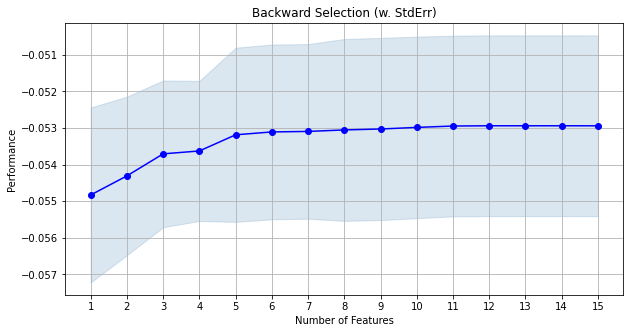

In [45]:
model_second = LinearRegression()
sfs = SFS(model_second, k_features='best', forward=False, floating=False, 
          scoring='neg_mean_squared_error', cv=20)
model = sfs.fit(X_train, y_train)

fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Backward Selection (w. StdErr)')
plt.grid()
plt.show()

In [46]:
print('Selected features:', sfs.k_feature_idx_)
#as you see, almost all features are important(all columns) when want to train all models with the best accuracy.

Selected features: (0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14)


# GaussianNB model

In [47]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train,y_train)

GaussianNB()

In [48]:
predictions=model.predict(X_test)
predictions

array([False, False, False, ..., False,  True, False])

In [49]:
score=accuracy_score(y_test,predictions)
score

0.9605

More specifically, the test determines whether it is equally likely that any randomly selected observation from one sample will be greater or less than a sample in the other distribution. If violated, it suggests differing distributions.
Fail to Reject H0: Sample distributions are equal.
Reject H0: Sample distributions are not equal

# Support Vector Machine model

In [50]:
model=SVC( shrinking=True,
    probability=True,
    tol=0.02,
    cache_size=100,
    degree=9
    )

In [51]:
model.fit(X_train,y_train)

SVC(cache_size=100, degree=9, probability=True, tol=0.02)

In [52]:
predictions=model.predict(X_test)
predictions

array([False, False, False, ..., False,  True, False])

In [53]:
score=accuracy_score(y_test,predictions)
score

0.9923333333333333

# Decision Tree Classifier

In [54]:
model=DecisionTreeClassifier(min_samples_split=9,
    min_samples_leaf=5,
    min_weight_fraction_leaf=0.5,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.1)

In [55]:
model.fit(X_train,y_train)

DecisionTreeClassifier(min_impurity_decrease=0.1, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.5)

In [56]:
predictions=model.predict(X_test)
predictions

array([False, False, False, ..., False, False, False])

In [57]:
score=accuracy_score(y_test,predictions)
score

0.8578333333333333

# Random Forest model

In [58]:
model=RandomForestClassifier(n_estimators=100,
    min_samples_split=5,
    min_samples_leaf=3,
    ccp_alpha=0.1)

In [59]:
model.fit(X_train,y_train)

RandomForestClassifier(ccp_alpha=0.1, min_samples_leaf=3, min_samples_split=5)

In [60]:
predictions=model.predict(X_test)
predictions

array([False, False, False, ..., False, False, False])

In [61]:
score=accuracy_score(y_test,predictions)
score

0.8578333333333333

# PCA (Principal Component Analysis)

Principal Component Analysis (PCA) is used to explain the variance-covariance structure of a set of variables through linear combinations. It is often used as a dimensionality-reduction technique.
PCA is not Definitely increase accuracy. PCA finds a vector that "best represents" your data set in a much lower dimension. To get better accuracy, you need to find a vector that "best discriminates" between your classes.

In [62]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
X

array([[ 0.        ,  0.        , -0.24693032, ..., -0.72558617,
        -0.43597081, -0.02337808],
       [ 0.        ,  0.        , -0.24693032, ..., -0.53774349,
         1.1275826 , -0.02337808],
       [ 0.        ,  0.        , -0.24693032, ..., -0.25597948,
        -1.47833975, -0.02337808],
       ...,
       [ 0.        ,  0.        , -0.24693032, ...,  0.49539123,
         0.60639813, -0.02337808],
       [ 0.        ,  0.        , -0.24693032, ..., -0.63166483,
         0.60639813, -0.02337808],
       [ 0.        ,  0.        , -0.24693032, ..., -0.63166483,
         1.64876707, -0.02337808]])

In [63]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X)

array([[-1.37293434e+00,  3.29579857e-01,  2.34910142e-01, ...,
         3.23894198e-03,  1.29383093e-17,  0.00000000e+00],
       [-1.33500112e+00,  7.44772919e-01,  3.66917036e-01, ...,
         2.41996776e-03,  4.87640827e-16, -0.00000000e+00],
       [-1.22914227e+00,  2.33582406e-01,  7.68855781e-02, ...,
         3.15482669e-03, -5.58941963e-21, -0.00000000e+00],
       ...,
       [-1.75372648e+00,  7.31039464e-01, -4.14292083e-01, ...,
         4.26789620e-04, -1.41000652e-20,  0.00000000e+00],
       [-8.85995504e-01,  2.47406114e-01, -4.55787359e-01, ...,
         1.25923676e-03, -2.89501954e-22,  0.00000000e+00],
       [-3.26036972e-01, -7.18805811e-01,  5.41926790e-01, ...,
         2.68590296e-03, -4.25953247e-20, -0.00000000e+00]])

In [64]:
pca.get_covariance()

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.13573641e-31,  6.35507254e-17,
         5.14155648e-17,  6.42939645e-17, -6.95982791e-17,
         2.02604156e-16,  6.82825015e-17,  2.38603551e-17,
         1.84035887e-16,  1.90909725e-16,  1.90557894e-16,
         7.64002250e-17,  9.42132600e-17, -6.49903512e-17],
       [ 0.00000000e+00,  6.35507254e-17,  1.00003333e+00,
         6.21318603e-01, -3.56731037e-03,  3.37368387e-02,
        -6.50904849e-03,  6.56143452e-01,  2.07378779e-02,
        -1.65111307e-02, -1.48922320e-02,  1.69475089e-02,
         5.69469633e-02,  3.70575299e-04,  5.91206253e-03],
       [ 0.00000000e+00,  5.14155648e-17,  6.21318603e-01,
         1.00003333e+00,  4.34706303e-01,  2.88794541

In [65]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([2.37291571e-01, 2.22560320e-01, 1.02169962e-01, 7.85445782e-02,
       7.74919764e-02, 7.58437026e-02, 7.40815754e-02, 7.33204302e-02,
       4.97275862e-02, 4.45840057e-03, 2.47828355e-03, 2.02188027e-03,
       9.73357459e-06, 6.10258845e-37, 0.00000000e+00])

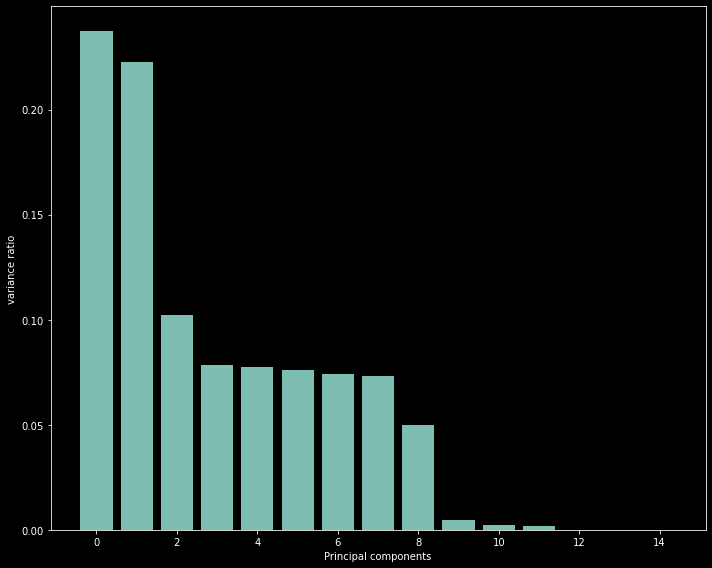

In [66]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(10,8))

    plt.bar(range(15), explained_variance, alpha=0.9, align='center',
            label='individual explained variance')
    plt.ylabel('variance ratio')
    plt.xlabel('Principal components')
    plt.tight_layout()

As you see in this plot, the first two components has the hight percentage of varience(alomost%55),the third until ninth they have almost 40% of the data spread and rest of them can be drop.

# Mann-Whitney U Test

The Mann-Whitney U test is a nonparametric statistical significance test for determining whether two independent samples were drawn from a population with the same distribution.

In [67]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu
# seed the random number generator
seed(16)
# generate two independent samples
airlines = 5 * randn(1000) + 51
airports = 5 * randn(1000) + 52
# compare samples
stat, p = mannwhitneyu(airlines, airports)
print('Statistics=%.3f, p=%.4f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=430162.000, p=0.0000
Different distribution (reject H0)


More specifically, the test determines whether it is equally likely that any randomly selected observation from one sample will be greater or less than a sample in the other distribution. If violated, it suggests differing distributions.
Fail to Reject H0: Sample distributions are equal.
Reject H0: Sample distributions are not equal

# Result and Conclusion

In the last part I want to tell my result and conclusion in any side.


1-In this list I show the percentage of each models:

1-Logistic Regression=99.43
3-Decision Tree=85.5
4-Random Forest=85.78
5-Support Vector Machine=99.23
6-GaussianNB model=96.05

We can see that SVM  and Logistic Regression models are giving the accuracy. So we choose Logistic Reression Model to predict the tune is more and Decision Tree has the worst model among these because of the bad accuracy.

If we want to improve our model, we can work on Decison tree and change the amount of the parameters(change the min_weight_fraction_leaf to 0.1) and also ccp_alpha for Random Forest.
 
2-for sum, count and delay part for ARR_DELAY with Destination, ABE  has the smallest average of delay in the destination(AVG_ARR_DELAY==-6.29032). On the other hand , YUM Destination has a lot of huge delays in single flights which effects the total delay of the airline.

3-The next part is which part of delay has the highest portion and NAS(Late Aircraft Delay)has the first step among others.


Thank you
